## 13. Метод Ньютона
*Метод Ньютона* нахождения корня уравнения $f(x) = 0$ заключается в итерациях вида
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.
$$
Написать функцию `mynewton(f, df, [x0, x1])`, реализующую метод Ньютона,
где 
`f` – строка, задающая правую часть $f(x)$ уравнения,
`df` – строка, задающая  $f'(x)$,
`[x0, x1]` – отрезок локализации.
Функция должна возвращать найденный корень с макимально возможной точностью.

Написать программу, тестирующую эту
функцию и сравнивающую ее с `scipy.optimize.newton`, `scipy.optimize.fsolve` на уравнениях:
$$
x^3 - 2x - 5 = 0, \qquad 0\le x \le 3
$$
(исторический пример Валлиса),
$$
\sin x = 0, \qquad 1 \le x \le 4,
$$
$$
x^3  = 0.001, \qquad -1 \le x \le 1,
$$
$$
\ln x + \frac{2}{3} = 0, \qquad 0 \le x \le 1,
$$
$$
\mathop{\rm sgn} (x-2)\, \sqrt{|x-2|} = 0, \qquad 1 \le x \le 4,
$$
$$
 \arctan x = \frac{\pi}{3}, \qquad 0 \le x \le 5,
$$
$$
\frac{1}{x - \pi} = 0, \qquad 0 \le x \le 5.
$$
Программа должна печатать таблицу, в которой указываются найденные функциями `mynewton`,
`scipy.optimize.newton`, `scipy.optimize.fsolve` решения, их относительные ошибки, и количества затраченных итераций.
Сравнить и следать выводы.

# Добавление библиотек

In [896]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

# Функции и их производные

In [897]:
def f1(x):
    return x ** 3 - 2 * x - 5

In [898]:
def df1(x):
    return 3*x**2-2

In [899]:
def f2(x):
    return np.sin(x)

In [900]:
def df2(x):
    return np.cos(x)

In [901]:
def f3(x):
    return x ** 3 - 0.001

In [902]:
def df3(x):
    return 3 * x ** 2

In [903]:
def f4(x):
    return np.log(x) + 2 / 3.0

In [904]:
def df4(x):
    return 1.0 / x

In [905]:
def f5(x):
    return np.sign(x - 2) * np.sqrt(abs(x - 2))

In [906]:
def df5(x):
    return ((-2 + x)* np.sign(-2 + x))/(2 * abs(-2 + x) ** (3 / 2))

In [907]:
def f6(x):
    return np.arctan(x) - np.pi / 3

In [908]:
def df6(x):
    return 1.0 / (x ** 2 + 1)

In [909]:
def f7(x):
    return 1 / (x - np.pi)

In [910]:
def df7(x):
    return -1 / ((x - np.pi) ** 2)

# Графики функций с их производными

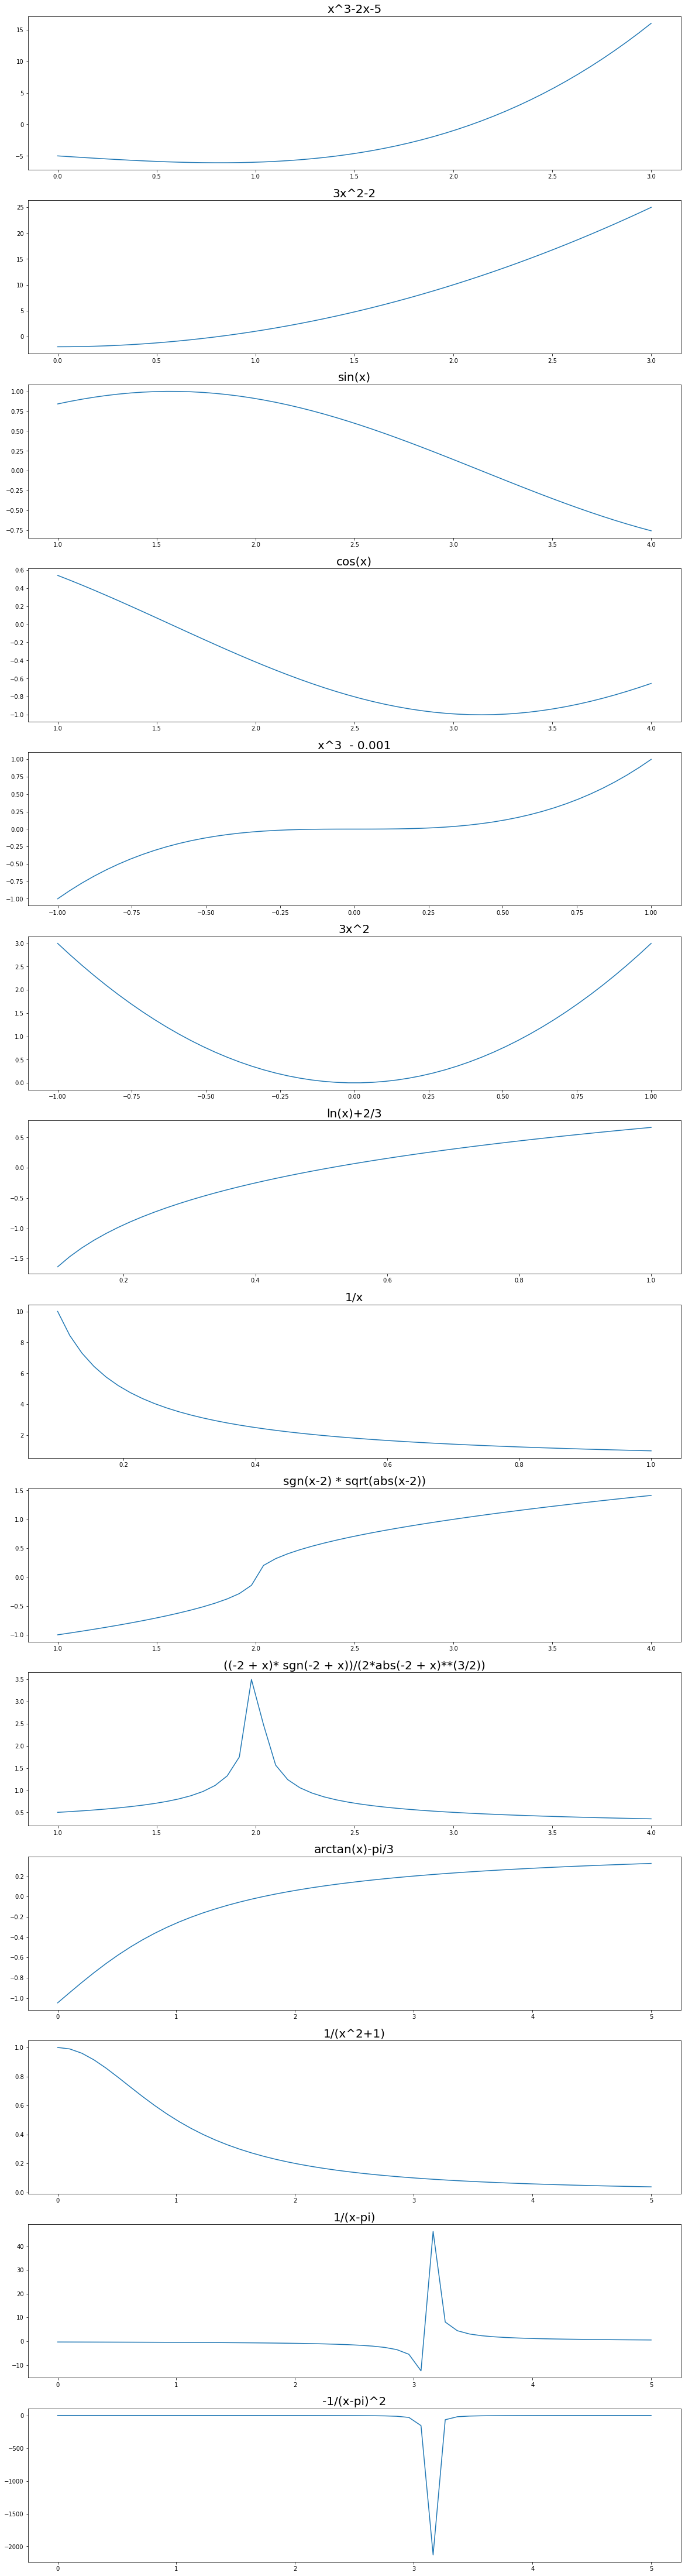

In [911]:
ig, a = plt.subplots(14, figsize=(20,80))
a[0].plot(np.linspace(0, 3, 50), f1(np.linspace(0, 3, 50)))
a[0].set_title('x^3-2x-5', fontsize=20)
a[1].plot(np.linspace(0, 3, 50), df1(np.linspace(0, 3, 50)))
a[1].set_title('3x^2-2', fontsize=20)
a[2].plot(np.linspace(1, 4, 50),f2(np.linspace(1, 4, 50)))
a[2].set_title('sin(x)', fontsize=20)
a[3].plot(np.linspace(1, 4, 50),df2(np.linspace(1, 4, 50)))
a[3].set_title('cos(x)', fontsize=20)
a[4].plot(np.linspace(-1, 1, 50),f3(np.linspace(-1, 1, 50)))
a[4].set_title('x^3  - 0.001', fontsize=20)
a[5].plot(np.linspace(-1, 1, 50),df3(np.linspace(-1, 1, 50)))
a[5].set_title('3x^2', fontsize=20)
a[6].plot(np.linspace(0.1, 1, 50),f4(np.linspace(0.1, 1, 50)))
a[6].set_title('ln(x)+2/3', fontsize=20)
a[7].plot(np.linspace(0.1, 1, 50),df4(np.linspace(0.1, 1, 50)))
a[7].set_title('1/x', fontsize=20)
a[8].plot(np.linspace(1, 4, 50),f5(np.linspace(1, 4, 50)))
a[8].set_title('sgn(x-2) * sqrt(abs(x-2))', fontsize=20)
a[9].plot(np.linspace(1, 4, 50),df5(np.linspace(1, 4, 50)))
a[9].set_title('((-2 + x)* sgn(-2 + x))/(2*abs(-2 + x)**(3/2))', fontsize=20)
a[10].plot(np.linspace(0, 5, 50),f6(np.linspace(0, 5, 50)))
a[10].set_title('arctan(x)-pi/3', fontsize=20)
a[11].plot(np.linspace(0, 5, 50),df6(np.linspace(0, 5, 50)))
a[11].set_title('1/(x^2+1)', fontsize=20)
a[12].plot(np.linspace(0, 5, 50),f7(np.linspace(0, 5, 50)))
a[12].set_title('1/(x-pi)', fontsize=20)
a[13].plot(np.linspace(0, 5, 50),df7(np.linspace(0, 5, 50)))
a[13].set_title('-1/(x-pi)^2', fontsize=20)
plt.show()

# Реализация

In [912]:
res = []
def mynewton(e, f, df, x0, x1):
    i = 0
    a = (x0 + x1) / 2;
    if (a == 0):
        a = x0
    b = abs(0-f(a))
    while b > e:
        a = a - f(a)/df(a)
        b = abs(0 - f(a))
        i += 1
        if (i >= 100000):
            return "ошибка"
        if (a < x0 or a > x1):
            return a, f(a), -1
    return a, f(a), i

# Исследование первой функции

In [913]:
x, fx, it = mynewton(1e-15, f1, df1, 0, 3)
list('mynewton')
[1e-15, x, fx, it]

[1e-15, 2.0945514815423265, -8.881784197001252e-16, 6]

In [914]:
of = optimize.newton(f1, 1.5, fprime = df1, tol = 1e-15, maxiter = 7)
list('scipy.optimize.newton')
[1e-15, of, f1(of), 7]

[1e-15, 2.0945514815423265, -8.881784197001252e-16, 7]

In [915]:
of = optimize.fsolve(f1, 1.5, fprime = df1, xtol = 1e-15)
list('scipy.optimize.fsolve')
[1e-15, of[0], f1(of[0]), "без ограничений"]

C:\Users\maksi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[1e-15, 2.0945514815423265, -8.881784197001252e-16, 'без ограничений']

- В scipy.optimize.fsolve необходимо убрать ограничение интераций

# Исследование второй функции

In [916]:
x, fx, it = mynewton(1e-15, f2, df2, 1, 4)
list('mynewton')
[1e-15, x, fx, it]

[1e-15, 3.141592653589793, 1.2246467991473532e-16, 4]

In [917]:
of = optimize.newton(f2, 2.5, fprime = df2, tol=1e-15, maxiter=5)
list('scipy.optimize.newton')
[1e-15, of, f2(of), 5]

[1e-15, 3.141592653589793, 1.2246467991473532e-16, 5]

In [918]:
of = optimize.fsolve(f2,2.5, fprime = df2, xtol = 1e-15)
list('scipy.optimize.fsolve')
[1e-15, of[0], f2(of[0]), "без ограничений"]

[1e-15, 3.141592653589793, 1.2246467991473532e-16, 'без ограничений']

- В scipy.optimize.fsolve необходимо убрать ограничение интераций

# Исследование третьей функции

In [919]:
x, fx, it = mynewton(1e-18, f3, df3, -1, 1)
list('mynewton')
[1e-18, x, fx, it]

[1e-18, 0.1, 2.168404344971009e-19, 13]

In [920]:
of = optimize.newton(f3, -1, fprime = df3, tol=1e-16, maxiter=14)
list('scipy.optimize.newton')
[1e-16, of, f3(of), 14]

[1e-16, 0.09999999999999999, -2.168404344971009e-19, 14]

In [921]:
of = optimize.fsolve(f3,-1 , fprime = df3, xtol = 1e-18)
list('scipy.optimize.fsolve')
[1e-18, of[0], f3(of[0]), "без ограничений"]

[1e-18, 0.09999999999999999, -2.168404344971009e-19, 'без ограничений']

- Для того чтобы scipy.optimize.newton работал с данным колличеством интераций, нужно увеличить точность
- scipy.optimize.newton и scipy.optimize.fsolve выполняют более точно 
- В scipy.optimize.fsolve необходимо убрать ограничение интераций

# Исследование четвортой функции

In [922]:
x, fx, it = mynewton(1e-14, f4, df4, 0,1)
list('mynewton')
[1e-14, x, fx, it]

[1e-14, 0.5134171190325911, -1.7763568394002505e-15, 3]

In [923]:
of = optimize.newton(f4, 0.5, fprime = df4, tol=1e-14, maxiter=4)
list('scipy.optimize.newton')
[1e-14, of, f4(of), 4]

[1e-14, 0.513417119032592, 0.0, 4]

In [924]:
of = optimize.fsolve(f4,0.5 , fprime = df4, xtol = 1e-14)
list('scipy.optimize.fsolve')
[1e-14, of[0], f4(of[0]), "без ограничений"]

[1e-14, 0.513417119032592, 0.0, 'без ограничений']

- optimize.newton и optimize.fsolve выполняются более точно
- В scipy.optimize.fsolve необходимо убрать ограничение интераций

# Исследование пятой функции

In [925]:
x, fx, it = mynewton(0.8, f5,df5,1,4)
list('mynewton')
[0.8, x, fx, it]

[0.8, 2.5, 0.7071067811865476, 0]

In [926]:
of = optimize.newton(f5, 2.5, fprime = df5)
list('scipy.optimize.newton')
['Невозможно выполнить']

RuntimeError: Failed to converge after 50 iterations, value is 2.5.

In [927]:
of = optimize.fsolve(f5,2.5 , fprime = df5, xtol = 1e-15)
list('scipy.optimize.fsolve')
[1e-15, of[0], f5(of[0]), "без ограничений"]

[1e-15, 2.0, 0.0, 'без ограничений']

- Метод Ньютона не работает
- В scipy.optimize.fsolve необходимо убрать ограничение интераций

# Исследование шестой функции

In [928]:
x, fx, it = mynewton(1e-15, f6, df6, 0, 5)
list('mynewton')
[1e-15, x, fx, it]

[1e-15, 1.732050807568875, -4.440892098500626e-16, 5]

In [929]:
of = optimize.newton(f6, 2.5, fprime = df6, tol = 1e-15)
list('scipy.optimize.newton')
[1e-15, of, f6(of), 4]

[1e-15, 1.7320508075688767, 0.0, 4]

In [930]:
of = optimize.fsolve(f6, 2.5, fprime = df6, xtol = 1e-15)
list('scipy.optimize.fsolve')
[1e-15, of[0], f6(of[0]), "без ограничений"]

[1e-15, 1.7320508075688772, 0.0, 'без ограничений']

- В scipy.optimize.fsolve и в scipy.optimize.newton, необходимо убрать ограничение интераций
- optimize.newton и optimize.fsolve выполняют более точно

# Исследование седьмой функции

In [931]:
x, fx, it = mynewton(0.39, f7, df7, 0, 5)
list('mynewton')
[0.39, x, fx, it]

[0.39, 0.5752220392306207, -0.38965533442631856, 2]

In [932]:
of = optimize.newton(f7, 2.5, fprime = df7, tol=0.7, maxiter = 3)
list('scipy.optimize.newton')
[0.7, of, f7(of), 4]

[0.7, 1.8584073464102069, -0.7793106688526371, 4]

In [933]:
of = optimize.fsolve(f7,2.5 , fprime = df7, xtol = 0.7)
list('scipy.optimize.fsolve')
[0.7, of[0], f7(of[0]), "без ограничений"]

[0.7, 1.8584073464102069, -0.7793106688526371, 'без ограничений']

- Необходимо увеличить точность
- mynewton выполняют более точно
- В scipy.optimize.fsolve необходимо убрать ограничение интераций

# Вывод

- scipy.optimize.fsolve лучше использовать без ограничения интераций
- есть функции где метод Ньютона не работает 